# **1. Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pd.options.mode.copy_on_write = True

# **2. Memuat Dataset dari Hasil Clustering**

In [2]:
df = pd.read_csv('dataset/marketing_campaign_labeled.csv', index_col=0)
df

,Year_Birth,Education,Income,NumWebVisitsMonth,Total_Day,Total_Cmp,Total_Purchase,Total_Child,Cluster
0,1957,Graduation,58138.0,7,663,1.0,25.0,0.0,2
1,1954,Graduation,46344.0,5,113,0.0,6.0,2.0,2
2,1965,Graduation,71613.0,4,312,0.0,21.0,0.0,3
3,1984,Graduation,26646.0,6,139,0.0,8.0,1.0,0
4,1981,PhD,58293.0,5,161,0.0,19.0,1.0,2
...,...,...,...,...,...,...,...,...,...
2188,1967,Graduation,61223.0,5,381,0.0,18.0,1.0,3
2189,1946,PhD,64014.0,7,19,1.0,22.0,3.0,3
2190,1981,Graduation,56981.0,6,155,1.0,19.0,0.0,2
2191,1956,Master,69245.0,3,156,0.0,23.0,1.0,3


# **3. Data Splitting**

In [3]:
df_encoded           = df.copy()
df_encoded.Education = df_encoded.Education.map({ 'Basic' : 0, '2n Cycle' : 1, 'Graduation' : 2, 'Master' : 3, 'PhD' : 4 })

In [4]:
X = df_encoded.drop(columns=['Cluster'])
y = df_encoded['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Training set shape : X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape     : X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape : X_train=(1754, 8), y_train=(1754,)
Test set shape     : X_test=(439, 8), y_test=(439,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Kita akan melakukan pelatihan dengan beberapa dataset, antara lain K-Nearest Neighbor, Decision Tree, Random Forest, Support Vector Machine, dan Gaussian Mixture Model.

## **b. Evaluasi Model Klasifikasi**

In [5]:
score_all = {}

In [6]:
def predict(model):
    model        = model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    cmatrix      = confusion_matrix(y_test, y_prediction)
    score        = [
        accuracy_score(y_test, y_prediction),
        precision_score(y_test, y_prediction, average='macro'),
        recall_score(y_test, y_prediction, average='macro'),
        f1_score(y_test, y_prediction, average='macro')
    ]

    print(f"Accuracy  : {score[0]:.4f}")
    print(f"Precision : {score[1]:.4f}")
    print(f"Recall    : {score[2]:.4f}")
    print(f"F1-Score  : {score[3]:.4f}")

    sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return score

### K-Nearest Neighbor (KNN)

Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000


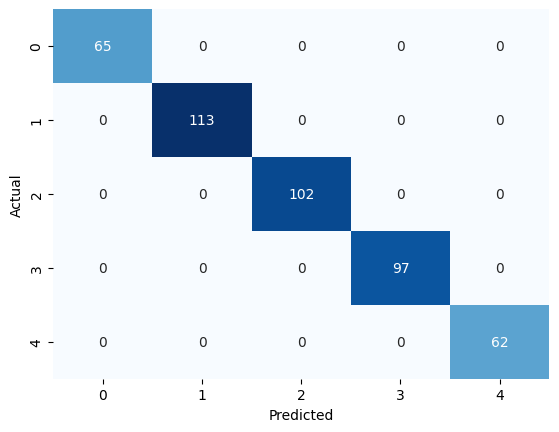

In [7]:
score_all['K-Nearest Neighbor'] = predict(KNeighborsClassifier())

### Decision Tree

Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000


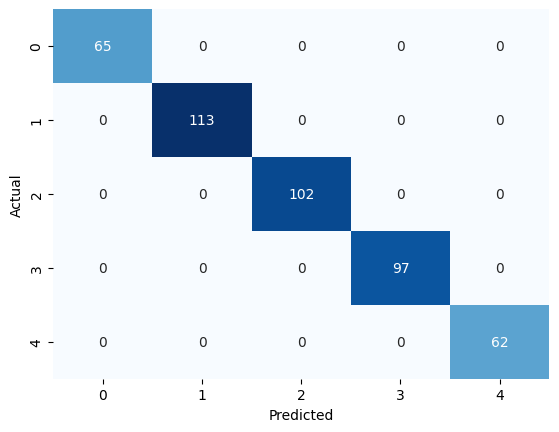

In [8]:
score_all['Decision Tree'] = predict(DecisionTreeClassifier())

### Random Forest

Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000


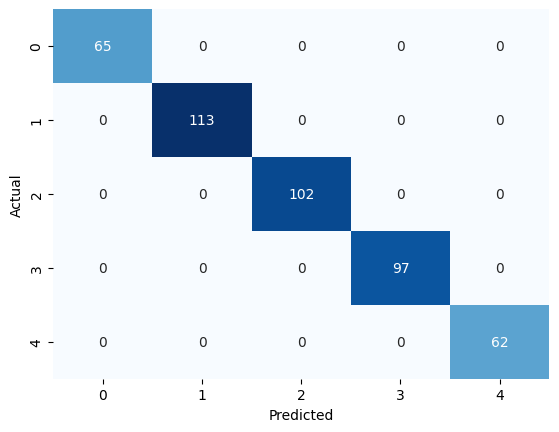

In [9]:
score_all['Random Forest'] = predict(RandomForestClassifier())

### Support Vector Machine (SVM)

Accuracy  : 0.9954
Precision : 0.9965
Recall    : 0.9938
F1-Score  : 0.9951


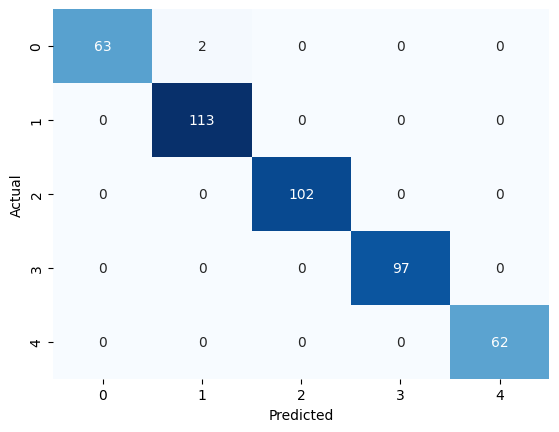

In [10]:
score_all['Support Vector Machine'] = predict(SVC())

### Naive Bayes (NB)

Accuracy  : 0.9453
Precision : 0.9463
Recall    : 0.9474
F1-Score  : 0.9467


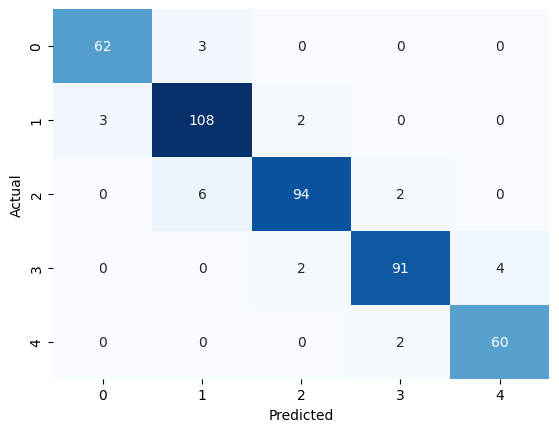

In [11]:
score_all['Naive Bayes'] = predict(GaussianNB())

## **c. Tuning Model Klasifikasi (Optional)**

Karena sudah hampir mendekati 100% semua, maka tidak perlu (capek njir).

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Tidak ada tuning berarti tidak ada evaluasi lagi.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [12]:
result = pd.DataFrame(data=score_all, index=['Accuracy', 'Precission', 'Recall', 'F1-Score'])

In [13]:
result

,K-Nearest Neighbor,Decision Tree,Random Forest,Support Vector Machine,Naive Bayes
Accuracy,1.0,1.0,1.0,0.995444,0.945330
Precission,1.0,1.0,1.0,0.996522,0.946300
Recall,1.0,1.0,1.0,0.993846,0.947411
F1-Score,1.0,1.0,1.0,0.995121,0.946655


1. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 100%
   - **Precision**: 100%
   - **Recall**: 100%
   - **F1-Score**: 100%

   **Analisis**: KNN memiliki skor 100% untuk semua aspek ini mungkin disebabkan karena model sederhana dan bisa menangkap pola yang sederhana juga, apalagi kita membuat label dengan model yang mencari tetangga terdekatnya yaitu KMeans yang cara kerjanya mirip dengan KNN.

2. **Decision Tree**
   - **Accuracy**: 100%
   - **Precision**: 100%
   - **Recall**: 100%
   - **F1-Score**: 100%

   **Analisis**: Decision Tree juga memiliki skor 100% untuk semua aspek ini mungkin juga disebabkan karena model sederhana.

3. **Random Forest**
   - **Accuracy**: 100%%
   - **Precision**: 100%
   - **Recall**: 100%
   - **F1-Score**: 100%

   **Analisis**: Random Forest juga memiliki skor 100% disebabkan oleh model Dicision Tree, karena begitulah cara model ini bekerja.

4. **Support Vector Machine (SVM)**
   - **Accuracy**: 99.54%
   - **Precision**: 99.65%
   - **Recall**: 99.38%
   - **F1-Score**: 99.51%

   **Analisis**: SVM memiliki skor yang menurun sebesar 1% daripada model sebelumnya. Penurunan ini mungkin disebabkan oleh algoritma dari model SVM yang lebih kompleks daripada model sebelumnya, yang mana terlalu kompleks untuk data ini.

5. **Naive Bayes**
   - **Accuracy**: 94.53%
   - **Precision**: 94.63%
   - **Recall**: 94.74%
   - **F1-Score**: 94.66%

   **Analisis**: Naive Bayes memiliki skor yang paling rendah daripada model lainnya, yang mana hingga 4%. Penurunan ini mungkin juga disebabkan oleh algoritma dari model Naive Bayes yang terlalu kompleks untuk data ini.

### **Kesimpulan:**

Gunakan model KNN, Decision Tree, atau Random Forest untuk melakukan klasifikasi pada data ini. Ini disebabkan algoritma dari model tersebut lebih sederhana daripada model seperti SVM dan Naive Bayes, yang mana model tersebut terlalu kompleks untuk data sederhana yang membuatnya memiliki skor dibawah 100%.

> Alhamdulillah njir gw ngerjain 24 jam+ karena g nemu silhouette skor diatas 0.54 buat dapet skor penilaian 😭, dan ternyata skor untuk klasifikasinya diatas 90% semua g espek aku 😭🥳.